In [11]:
# Mercari Price Suggestion

In [12]:
import pandas as pd
#mercari_data = pd.read_csv('train.tsv/train.tsv',sep='')
mercari_data = pd.read_csv('train.tsv/train.tsv',sep='\t',error_bad_lines=False)
mercari_data.head(n=100)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


In [13]:
# To get the size of the training dataset
mercari_train_data.shape

(1482535, 8)

In [14]:
# To check the basic stats of data
mercari_data.describe(include='all')

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
count,1.482535e+06,1482535,1.482535e+06,1476208,849853,1.482535e+06,1.482535e+06,1482531
unique,NaN,1225273,NaN,1287,4809,NaN,NaN,1281426
top,NaN,Bundle,NaN,"Women/Athletic Apparel/Pants, Tights, Leggings",PINK,NaN,NaN,No description yet
freq,NaN,2232,NaN,60177,54088,NaN,NaN,82489
mean,7.412670e+05,NaN,1.907380e+00,NaN,NaN,2.673752e+01,4.472744e-01,NaN
std,4.279711e+05,NaN,9.031586e-01,NaN,NaN,3.858607e+01,4.972124e-01,NaN
min,0.000000e+00,NaN,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,3.706335e+05,NaN,1.000000e+00,NaN,NaN,1.000000e+01,0.000000e+00,NaN
50%,7.412670e+05,NaN,2.000000e+00,NaN,NaN,1.700000e+01,0.000000e+00,NaN
75%,1.111900e+06,NaN,3.000000e+00,NaN,NaN,2.900000e+01,1.000000e+00,NaN


In [15]:
#To check different data
mercari_data.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [16]:
# Check different types.
print("Number of unique category:",mercari_data.category_name.nunique())
print("Number of unique brand:",mercari_data.brand_name.nunique())
print("Number of unique name:",mercari_data.name.nunique())

Number of unique category: 1287
Number of unique brand: 4809
Number of unique name: 1225273


In [17]:
mercari_data = mercari_data[mercari_data['category_name'].notnull()]
mercari_data = mercari_data[mercari_data['item_description'].notnull()]
mercari_data['first_category'] = mercari_data['category_name'].apply(lambda x:x.split('/')[0])
mercari_data['second_category'] = mercari_data['category_name'].apply(lambda x:x.split('/')[1])
mercari_data['third_category'] = mercari_data['category_name'].apply(lambda x:x.split('/')[2])
mercari_data.head(n=5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,first_category,second_category,third_category
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [89]:
# Total number of Categories
print("Number of Unique First Category is :",mercari_data.first_category.nunique())
print("Number of unique second category is:",mercari_data.second_category.nunique())
print("Number of unique third category is:",mercari_data.third_category.nunique())

Number of Unique First Category is : 10
Number of unique second category is: 113
Number of unique third category is: 870


In [20]:
print("Total Selling Revenue by Combination of Categories:",mercari_data.groupby(['first_category','second_category']).price.sum())

print("Total Selling Revenue by Combination of Categories:",type(mercari_data.groupby(['first_category','second_category']).price.sum()))

print(mercari_data.groupby(['first_category','second_category']).price.sum().nlargest(10))

Total Selling Revenue by Combination of Categories: first_category          second_category          
Beauty                  Bath & Body                   148059.0
                        Fragrance                     578223.0
                        Hair Care                     150541.0
                        Makeup                       2328697.0
                        Other                          11224.0
                        Skin Care                     611611.0
                        Tools & Accessories           259892.0
Electronics             Cameras & Photography         283663.0
                        Car Audio, Video & GPS         19543.0
                        Cell Phones & Accessories    1606282.0
                        Computers & Tablets           653797.0
                        Media                         169381.0
                        Other                          28829.0
                        TV, Audio & Surveillance      402867.5
                

In [88]:
# Clean the item description field to remove the punctuations,numbers etc.
import re
import string
#print(re.escape('a@b#h$a*y'))

def word_analysis(text):
        try:
            text = text.lower()
            reg_exp_pattern = re.compile('['+re.escape(string.punctuation)+'0-9\\r\\t\\n]')
            mod_text = reg_exp_pattern.sub(" ",text)
            #print(mod_text)
        except:
            mod_text = ""
        return mod_text

# Call the function to remove the punctuations,numbers etc. from text description.
mercari_data['new_description'] = mercari_data['item_description'].apply(lambda x: word_analysis(x))
mercari_data.head(n=20)        

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,first_category,second_category,third_category,new_description,new_description_stopwords_removed,description_length,average_price_by_first_category
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,no description yet,description yet,2,NaN
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,this keyboard is in great condition and works ...,keyboard great condition works like came box p...,18,NaN
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,adorable top with a hint of lace and a key hol...,adorable top hint lace key hole back pale pink...,14,NaN
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,new with tags leather horses retail for rm ...,new tags leather horses retail rm stand foot h...,18,NaN
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,complete with certificate of authenticity,complete certificate authenticity,3,NaN
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other,banana republic bottoms candies skirt with ma...,banana republic bottoms candies skirt matching...,14,NaN
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,size small but straps slightly shortened to fi...,size small straps slightly shortened fit xs be...,10,NaN
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,you get three pairs of sophie cheer shorts siz...,get three pairs sophie cheer shorts size small...,33,NaN
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,girls size small plus green three shorts total,girls size small plus green three shorts total,8,NaN
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll,i realized his pants are on backwards after th...,realized pants backwards picture dirty hand wa...,28,NaN


In [90]:
# Remove stop words from the text description

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            
    #return filtered_sentence
    return ' '.join(filtered_sentence)

# Function call to remove stop_words from item description
mercari_data['new_description_stopwords_removed'] = mercari_data['new_description'].apply(lambda x : remove_stopwords(x))

In [92]:
mercari_data['description_length'] = mercari_data['new_description_stopwords_removed'].apply(lambda x: len(x.split()))

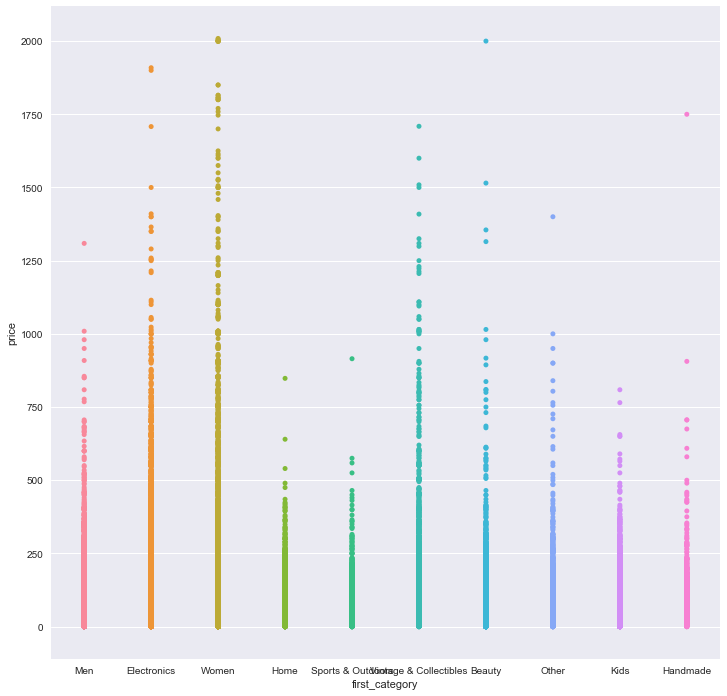

In [27]:
# To show the price variation of items by first category
import seaborn as sns
from matplotlib import pyplot as plt
% matplotlib inline
f, ax = plt.subplots(figsize=(12,12))
sns.stripplot(x='first_category',y='price',data=mercari_data)

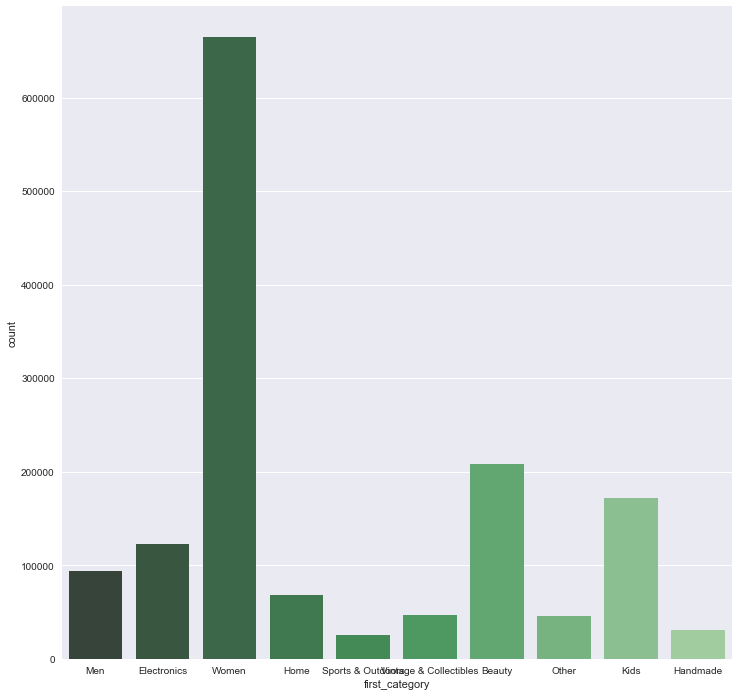

In [86]:
# To show the number of observations for each first category.
%matplotlib inline
f, ax = plt.subplots(figsize=(12,12))
sns.countplot(x="first_category",data=mercari_data,palette='Greens_d')

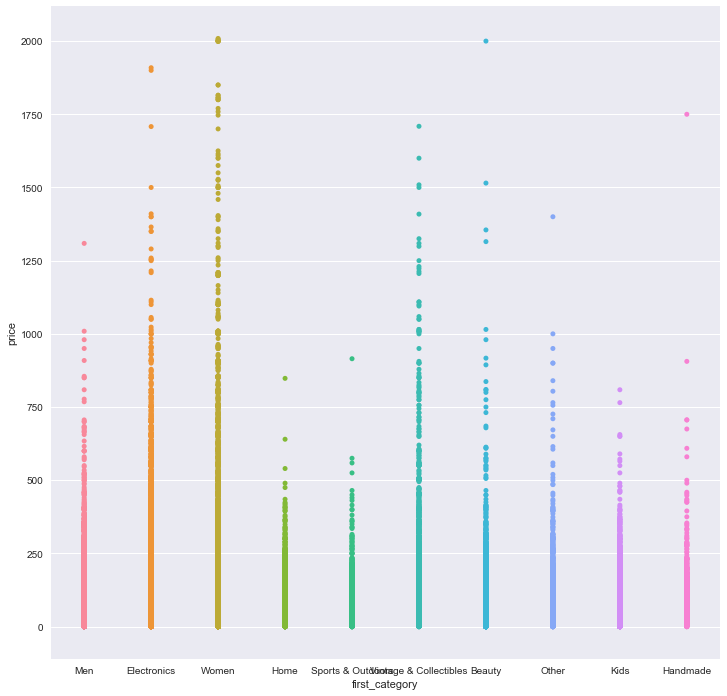

In [29]:
# To show the price variation of items by first category
import seaborn as sns
from matplotlib import pyplot as plt
% matplotlib inline
f, ax = plt.subplots(figsize=(12,12))
sns.stripplot(x='first_category',y='price',data=mercari_data)

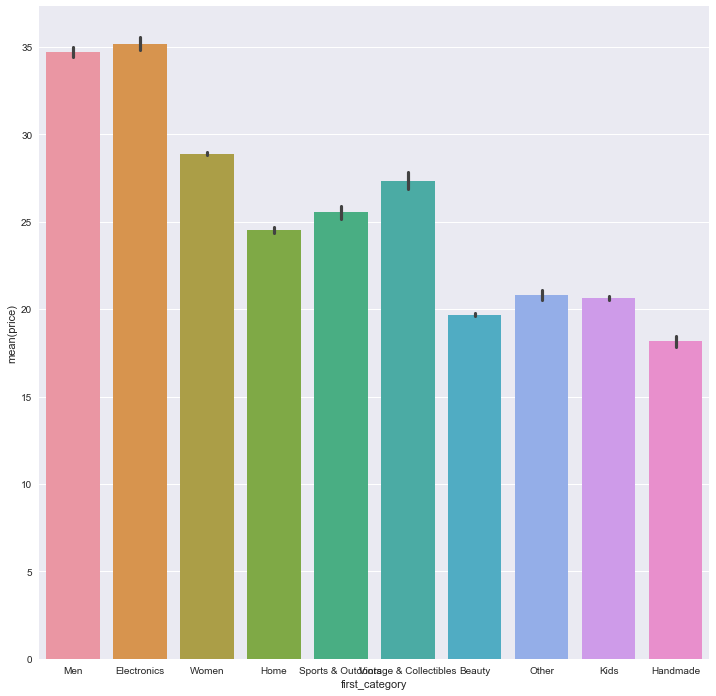

In [30]:
# To show the average price of items belonging to first category using box plot

%matplotlib inline
f, ax = plt.subplots(figsize=(12,12))
sns.barplot(x="first_category",y="price",data=mercari_data)

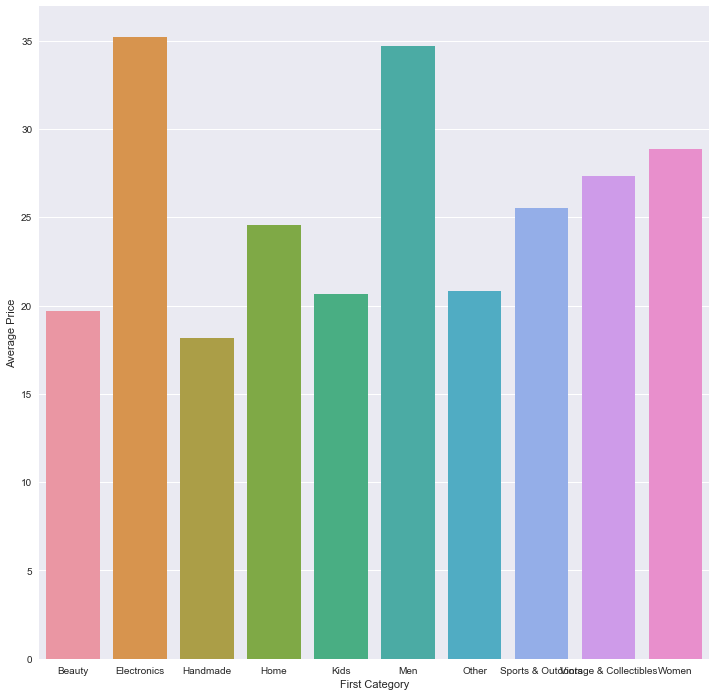

In [87]:
import seaborn as sns
%matplotlib inline
mercari_data = mercari_data[mercari_data['first_category'].notnull()]
mercari_average_price_by_first_category_data = mercari_data.groupby(['first_category'])['price'].mean().reset_index()
#mercari_average_price_by_first_category_data.first_category = mercari_average_price_by_first_category_data.first_category.astype('|S80')
f, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='first_category',y='price',data=mercari_average_price_by_first_category_data)
plt.xlabel("First Category")
plt.ylabel("Average Price")

In [83]:
# To Calculate Top 10 Average Price by Brand
import seaborn as sns
%matplotlib inline
#mercari_average_price_by_first_category_data = mercari_data.groupby(['brand_name'])['price'].mean().reset_index()
mercari_average_price_by_brand_name_data = mercari_data.groupby(['brand_name'])['price'].mean().nlargest(10).reset_index()
mercari_average_price_by_brand_name_data.head(n=50)

,brand_name,price
0,Demdaco,429.000000
1,Proenza Schouler,413.250000
2,Oris,300.000000
3,MCM Worldwide,289.173913
4,Longines,254.000000
5,Vitamix,253.111111
6,Blendtec,251.800000
7,David Yurman,248.611570
8,Celine,238.780822
9,Saint Laurent,233.622047


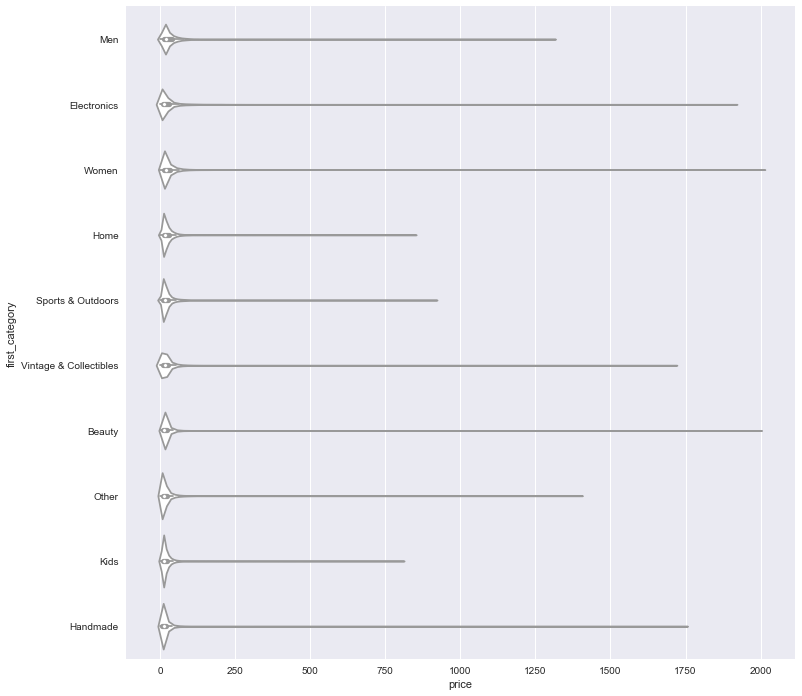

In [32]:
# Scttare plot of text description and price
%matplotlib inline
f, ax = plt.subplots(figsize=(12,12))
#sns.stripplot(y='description_length',x='brand_name',data=mercari_data)
sns.violinplot(x="price",y="first_category",data=mercari_data,color="w",alpha=0.5)

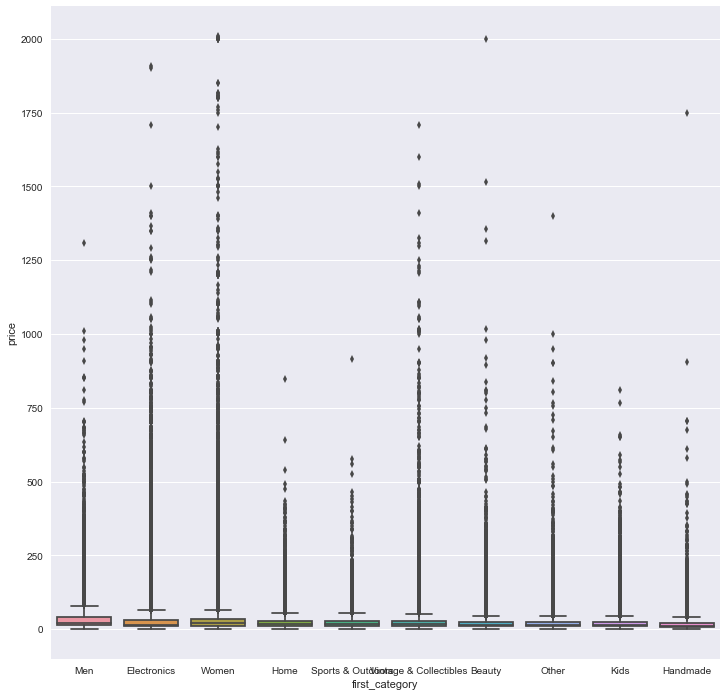

In [33]:

%matplotlib inline
f, ax = plt.subplots(figsize=(12,12))
sns.boxplot(x="first_category",y="price",data=mercari_data)

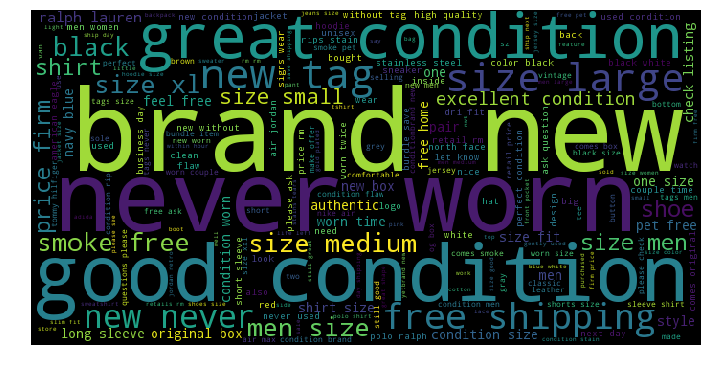

In [96]:
# Check the most frequently occuring words for items belonging to Men Category
mercari_data.head(n=5)
from wordcloud import WordCloud

new_mercari_data = mercari_data[mercari_data['first_category']=='Men']
wordcloud = WordCloud(width=700,height=350).generate(''.join(new_mercari_data['new_description_stopwords_removed']))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

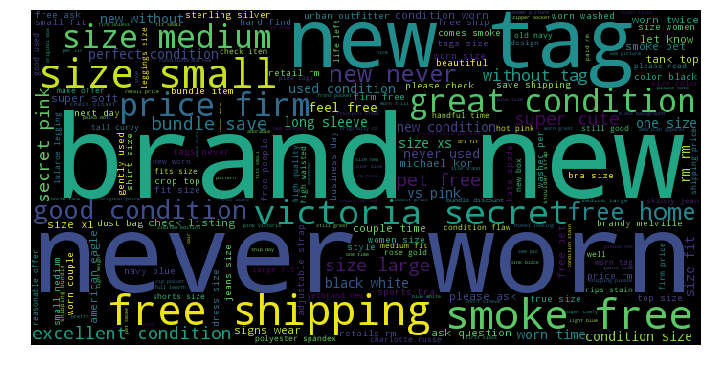

In [94]:
# Check the most frequently occuring words for items belinging to Men Category
mercari_data.head(n=5)
from wordcloud import WordCloud

new_mercari_data = mercari_data[mercari_data['first_category']=='Women']
wordcloud = WordCloud(width=700,height=350).generate(''.join(new_mercari_data['new_description_stopwords_removed']))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

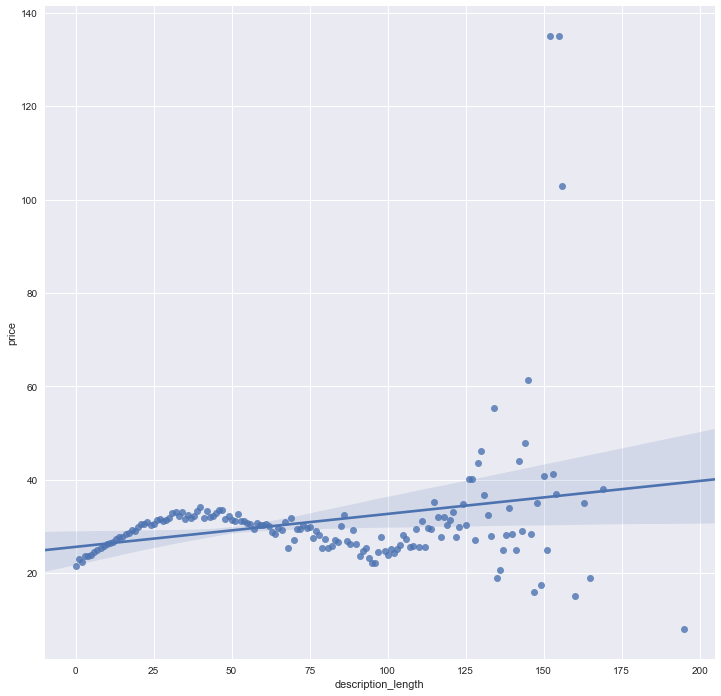

In [95]:
# Plot to show the variation of average price of item with description length
import seaborn as sns
%matplotlib inline
data = mercari_data.groupby(['description_length'])['price'].mean().reset_index()
f, ax = plt.subplots(figsize=(12,12))
sns.regplot(x='description_length',y='price',data=data)

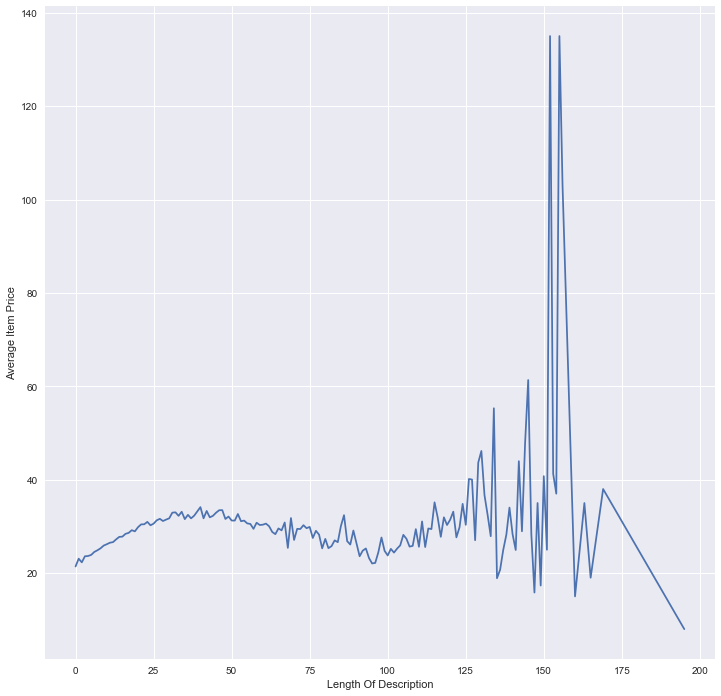

In [107]:
# Variation of Average Price of Item by Description Length
mercari_data_average_price_by_description_length = mercari_data.groupby(['description_length'])['price'].mean().reset_index()
mercari_data_average_price_by_description_length.head(n=100)
plt.subplots(figsize=(12,12))
plt.plot('description_length','price',data=mercari_data_average_price_by_description_length)
plt.xlabel("Length Of Description")
plt.ylabel('Average Item Price')

In [108]:
# Average price of shipped vs. non-shipped items
mercari_data_by_shipping = mercari_data.groupby(['shipping'])['price'].mean()
mercari_data_by_shipping.head(n=2)

shipping
0    30.123128
1    22.572590
Name: price, dtype: float64

In [116]:
#print(mercari_data.item_condition_id.unique())
mercari_data_by_item_condition = mercari_data.groupby(['item_condition_id'])['price'].mean().reset_index()
mercari_data_by_item_condition.head(n=5)

,item_condition_id,price
0,1,26.493409
1,2,27.577433
2,3,26.538499
3,4,24.365233
4,5,31.754741
